# **Solving Eigenvalues of One-Dimensional (1D) Schrödinger Equation**

---
In this assignment, we are going to explore the numerical methods to solve the eigenvalues of 1D Schrodinger equation for a particle in a potential well . This method involves converting the Schrodinger equation into boundary value problem and numerically solving it using a wavefunction approximation.

The time-independent Schrödinger equation describes the behavior of a quantum particle in a potential $V(x)$. It is given by:

$$ -\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x) \psi(x) = E \psi(x) $$

This Python codes  involves initializing the potential function, setting up the Numerov method , applying Root-finding with the shooting method by computing the eigenvalues and eigenfunctions of the system. 
The root-finding method adjust the energy $E$ until the wavefunction satisfies the boundary conditions at the turning points in order to visualize the wavefunctions. 

The Schrodinger equation can written in the form of $\psi"(x)$ which is 

$$
\psi''(x) + \frac{2m}{\hbar^2} \left[E - V(x)\right] \psi(x) = 0
$$

It is also in the form of Sturm-Lioville problem which is :

$$ \frac{d}{dx}(p(x)\frac{du(x)}{dx})+ q(x)u(x) = r(x) $$

The Sturm-Liouville problem is essential in physics because it describes a wide class of boundary-value problems, including eigenvalue problems like those encountered in quantum mechanics.Its solutions $u(x)$ or $ψ(x)$ for the Schrödinger equation) must satisfy specific boundary conditions, which often involve matching values and derivatives at specific points.

Numerov's method 
It is fourth-order numerical algorithm tailored for solving second-order differential equations of the Sturm-Liouville type when $p(x)=1$ and $r(x)=0$

However, this is only a part of the introduction. The process of solving the 1D Time-Independent Schrodinger Equation  will be explained more after this . 


<b> Importing required libraries </b> 

In order to start writing a code, we import the necessary libraries to carry out computation and visualization tasks :

In [55]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.optimize import root_scalar, fsolve

This first step is very important in order to use pre-built tools and functions for specific tasks. Specifically, {numpy} is for efficient numerical calculations and array operations , matplotlib.pyplot is a plotting library for creating visualizations and scipy.optimize provides algorithms for numerical optimization and root-finding 

**Visualizing the potential function $V(x)$**

The Python code below shows how define the constants and parameters works in solving the problem. It helps to clealy label important quantities. Most importantly, this initialization is essential in calculating the potential function and other related computations 

In [56]:
# Constants and Parameters
hbar = 1  # Reduced Planck constant 
m = 1     # Particle mass (in atomic units)
alpha = 1 # Alpha parameter (in atomic units)
lambda_ = 4 # Lambda parameter (specific to the potential form)

These constants are set to 1 for convenience, as described in the problem $(\hbar=1 , m=1)$, </b> 
 
 $\alpha$ and $\lambda$ are parameters defining the shape and depth of the potential $V(x)$ 

**Defining the x-value range** 
 
This part sets up the range of x-values over which we will evaluate and plot the potential function. 

In [57]:
# Setting parameters for x-value range
a_min, a_max, h = -10, 10 , 0.05 # Range for a
x = np.arange(a_min, a_max + h, h)

It define the minimum and maximum values of x, which will represent the spatial domain over which the potential function is computed (from -10 to 10).The step size, set to 0.05, which will determine the spacing between points in the range.We generate an array of values using np.arange(), starting at a_min, ending at a_max, with a step size of h.

**Defining the Potential Function** 

The potential function is defined based on the One-Dimensional Time-Independent Schrodinger Equation for a particular potential form. 

In [58]:
# Potential Function
def potential(x):
    coeff = (hbar**2 / (2 * m)) * alpha**2 * lambda_ * (lambda_ - 1)
    return coeff * (0.5 - 1 / (np.cosh(alpha * x)**2))

The potential function equation from the code stated above is according to the assignment question in order to solve the problem . For a bound particle in the potential well: 

$$ V(x) = \frac{\hbar^2}{2m} \alpha^2 \lambda (\lambda - 1) \left[\frac{1}{2} - \frac{1}{\cosh^2 (\alpha x)}\right] $$

This specific form of $V(x)$ is a modified Pöschl-Teller potential, which is exactly solvable for certain parameters.This potential represnets a well with steep walls at $|x| ->\infty$ at a central region where the potential is nonzero.

**Plotting the Potential Function**

Text(0.5, 1.0, 'Potential V(x) of 1D TISE')

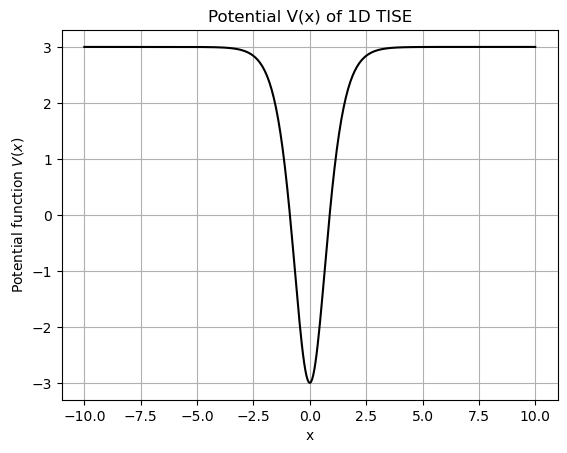

In [59]:
# Plotting the potential function
mpl.plot(x, potential(x), color="black")
# Adding labels
mpl.xlabel("x")
mpl.ylabel("Potential function $V(x)$")

# Plot title
mpl .title("Potential V(x) of 1D TISE")
# Adding labels and grid 
mpl.xlabel("x")
mpl.ylabel("Potential function $V(x)$")
mpl.grid(True)

# Plot title
mpl.title("Potential V(x) of 1D TISE")


- **Plot**: The plot shows $V(x)$ as a function of $x$ using the `mpl.plot()` function.
- **Labels**: The $x$-axis represents the position, while the $y$-axis represents the potential energy.
- **Title**: The plot is titled "Potential V(x) of 1D TISE" to indicate that it visualizes the potential used in solving the one-dimensional time-independent Schrödinger equation (TISE).

This plot helps to understand the behavior of the potential well, which influences the eigenvalues and wavefunctions of the system.

#### **Solving the Eigenvalues with Numerov's Method**

**Eigenvalue Problem**

To solve the eigenvalue problem, we typically use numerical methods like the Numerov algorithm. In Numerov's method, we solve  the equation for the wavefunction $\psi(x)$ numerically, starting from one side of the potential region (from left to right) and continuing until the boundary conditions are satisfied. The wavefunction must approach zero at infinity, which means that the solution must match certain conditions at turning points where the potential energy equals the total energy.

**Matching the solutions**

Since the wavefunction must satisfy boundary conditions at the turning points, we integrate the equation from both sides of the potential well, which lead to the following continuity conditions:

$$
\psi_{l}(x_{r}) = \psi_{r}(x_{r})
$$
$$
\psi'_{l}(x_{r}) = \psi'_{r}(x_{r})
$$
 
where $\psi_{l}(x)$ for the solution integrated from the left and $\psi_{r}(x)$ for the solution integrated from the right.

By combining these two conditions, we obtain a relationship between the wavefunctions and their derivatives at $x_r$

$$
\frac{\psi_l'(x_r)}{\psi_l(x_r)} = \frac{\psi_r'(x_r)}{\psi_r(x_r)}
$$

**Three-Point Formula**

The matching of the wavefunction solutions is carried out using a three-point formula, which is a numerical method for approximating derivatives. For the first-order approximation of the derivative at the point $x_r$, the three-point formula is given by:

$$
f(E) = \frac{ \left[ \psi_l(x_r + h) - \psi_l(x_r - h) \right] - \left[ \psi_r(x_r + h) - \psi_r(x_r - h) \right] }{ 2h \psi(x_r) }
$$

For bound states (where the particle is confined in the potential well), the boundary conditions are that the wavefunction $\psi(x)$ does to zero as $x→±\infty$. This ensures that the particle is confined within the potential well and that its probability of being found outside the well is zero.

At the turning points of the potential, the wavefunction transitions from oscillatory behavior to exponential decay. The energy eigenvalues correspond to the energies at which these boundary conditions are satisfied.

### **Eigenvalues Function**
This part calculates the energy eigenvalues for a particle confined in a potential well using the given parameters.The energy eigenvalues are determined by the formula:

$$
E_n = \frac{\hbar^2}{2m} \alpha^2 \left( \frac{\lambda(\lambda - 1)}{2} - (\lambda - 1 - n)^2 \right)
$$

where
- $\hbar$ is the reduced Planck constant,
- $m$ is the mass of the particle,
- $\alpha$ is a parameter related to the width of the potential well,
- $\lambda$ is a given parameter of the potential,
- $n$ is the index of the energy level, where $n = 0, 1, 2, \dots $.

To start solving the eigenvalues, we start with the same method as potential well graph before. The python code started with import the libraries  

In [60]:
import numpy as np
import matplotlib.pyplot as mpl

# Constants
hbar_ = 1
m = 1
alpha = 1
lambda_ = 4

# Potential well function
def potential_well(x):
    factor = hbar_**2 / (2 * m)
    return factor * (alpha**2 * lambda_ * (lambda_ - 1) * (0.5 - 1 / np.cosh(alpha * x)**2))

The parameters of potential well equations are defined. The equation of potential well also used as before which is :

$$ V(x) = \frac{\hbar^2}{2m} \alpha^2 \lambda (\lambda - 1) \left[\frac{1}{2} - \frac{1}{\cosh^2 (\alpha x)}\right] $$

In [61]:
# Eigenvalue function
def eigenvalue(n):
    term = lambda_ - 1 - n
    return (hbar_**2 / (2 * m)) * (alpha**2) * (lambda_ * (lambda_ - 1) / 2 - term**2)

**Computing Eigenvalues for the First Three States**

The first three energy states is computed starting from $n=0$ to $n=2$. This is done by calling the function for each value of $n$ and storing the results in the list energy 

In [62]:
# Compute eigenvalues for first three states
energy = [eigenvalue(n) for n in range(3)]
print("Computed Eigenvalues:", energy)

Computed Eigenvalues: [-1.5, 1.0, 2.5]


This outputs the computed energy eigenvalues for the first three states and helps in understanding the energy levels of the system

**Calculation of $E_n$**

Here I attached how to calculate the Eigenvalues manually. 
The formula for $E_n$ is:

$$
E_n = \frac{\hbar^2}{2m} \alpha^2 \left[ \frac{\lambda (\lambda - 1)}{2} - (\lambda - 1 - n)^2 \right]
$$
Parameters: $\hbar = 1$, $m = 1$, $\alpha = 1$, $\lambda = 4$

Substituting $\hbar = m = \alpha = 1$, the formula simplifies to:

$$
E_n = \frac{1}{2} \left[ \frac{\lambda (\lambda - 1)}{2} - (\lambda - 1 - n)^2 \right]
$$

Substitute $n=0,1,2$ into the equation, then we get 

$$
E_n = \frac{1}{2} \left[ \frac{4 (4 - 1)}{2} - (4 - 1 - 0)^2 \right]
$$

$E_n = -1.500$

The calculation is repeated usingthe enxt value of $n$



**Numerov's method**

As stated in the introduction, the Schrodinger equation can written in the form of $\psi''(x)$ which is 

$$
\psi''(x) + \frac{2m}{\hbar^2} \left[E - V(x)\right] \psi(x) = 0
$$ 

which introducing the following notation : 
1. $p(x) = 1$:
   This is a constant function, which represents the coefficient of the second derivative term in the equation.

2. $q(x) = \frac{2m}{\hbar^2} [E - V(x)]$
    - Here, $m$ is the mass of the particle, $\hbar$ is the reduced Planck's constant, $E$ is the energy eigenvalue, and $V(x)$ is the potential energy at position $x$
    - This function represents the "potential-like" term in the equation, incorporating the energy of the system and the potential energy.

3. $r(x) = 0$
   - This is the constant function zero, indicating that there is no term independent of $\psi(x)$ in the equation.

From the 2nd term, $q(x) = \frac{2m}{\hbar^2} [E - V(x)]$, we can get the equation stated below : 

$$
\psi''(x) + q(x)\psi(x) = 0 
$$

which is known as Numerov's method. It provides a fourth-order approximation for iteratively solving for the wavefunction $\psi(x)$ over a spatial grid. 

**What is Numerov's Method?** 

Numerov's method is a numerical integration technique used to solve second-order differential equations like the Scrodinger equation. It is a higher-order method that provides better accuracy then simpler methods like Euler or Runge-Kutta. The method's accuracy and efficiency for small step sizes make it very helpful for solving the Schrödinger equation.

The idea of **shooting method** (which is based on the Numerov method) is to integrate the Schrodinger equation from one side os the potential region to the other. However, since the wavefunction decays exponentially at infinity, the solution is computed in two directions which is : 
   - From left to right (from starting point at $x=-\infty$)
   - From right to left (from $x = +\infty$)

The numerov method is shown in the code stated below :


In [63]:
# Numerov method for solving the wavefunction
def numerov(E, x, psi_0, psi_1):
    h = x[1] - x[0]
    psi = np.zeros_like(x)
    psi[0], psi[1] = psi_0, psi_1

    for i in range(1, len(x) - 1):
        q_curr = 2 * m / hbar_**2 * (E - potential_well(x[i]))
        q_prev = 2 * m / hbar_**2 * (E - potential_well(x[i - 1]))
        q_next = 2 * m / hbar_**2 * (E - potential_well(x[i + 1]))
        psi[i + 1] = (2 * (1 - 5 * h**2 * q_curr / 12) * psi[i] -
                      (1 + h**2 * q_prev / 12) * psi[i - 1]) / (1 + h**2 * q_next / 12)
    return psi
    return wavefunc

The Numerov method is directly derived from three-point formula which is finite-difference approximation for second-order derivatives. 

**Numerov Recurrence Relation**

The Numerov algorithm computes the wavefunction $\psi$ at the next grid point $\psi_{i+1}$ using the following recurrence relation:

$$
\psi_{i+1} = \frac{2 \left( 1 - \frac{5}{12} h^2 q_i \right) \psi_i - \left( 1 + \frac{h^2}{12} q_{i-1} \right) \psi_{i-1}}{1 + \frac{h^2}{12} q_{i+1}}
$$

Where:
- $h$: Step size, given by $h = x_{i+1} - x_i$
- $q_i$: The coefficient $q(x)$ evaluated at the $i$-th grid point
- $\psi_i$: Wavefunction value at the $i$-th grid point

This recurrence relation calculates the value of the wavefunction at a new point $\psi_{i+1}$ using the values of the wavefunction at the current point $\psi_{i}$ and the previous point $\psi_{i-1}$ along with the values of the potential at those points. This recurrence relation allows us to calculate the wavefunction at successive grid points, starting from initial values at the first two grid points $\psi_0$ and $\psi_1$.

**Plotting the Potential and Wavefunctions**

We define a spatial grid, `x`, which spans from -4 to 4 with 1000 points. This will be used as the independent variable in the Schrödinger equation.

In [64]:
x = np.linspace(-4, 4, 1000)

Here is the last part which will print out all the plots that  have mentioned 

**Plotting the Potential Well**

The potential V(x) is calculated by using the potential_well(x) function, which returns the potential values for each point in the spatial grid. The potential is plotted as a black line on the graph.

**Plotting the Wavefunctions**

For each energy value in the list energy (calculated previously), the corresponding wavefunction $\psi(x)$is computed using the numerov() function. The wavefunctions are normalized to ensure clarity and visual comparison. The energy offset is added to each wavefunction plot for better visualization, ensuring that they don't overlap with the potential plot.

The following loop iterates through each energy value, computes the wavefunction, and plots it with the corresponding energy

**Plot graph elements**

This is how we configure the plot with labels, a title, and a legend for better understanding,  we also draw a horizontal line at $y=0$ (using axhline) to help distinguish between the potential and wavefunction plots, and we display the grid for better visualization.

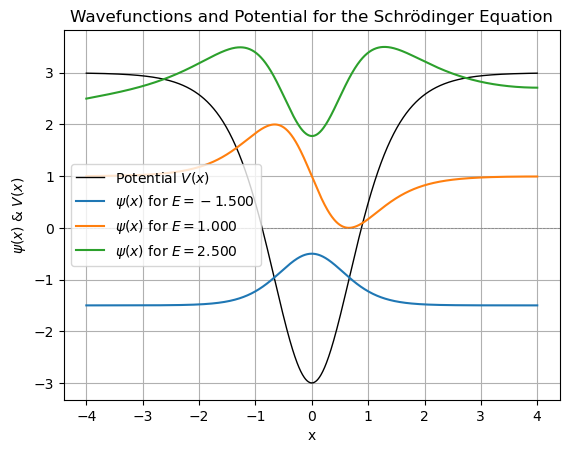

In [65]:
V = potential_well(x)
mpl.plot(x, V, label="Potential $V(x)$", color="black", linewidth=1)

for idx, E in enumerate(energy):
    psi = numerov(E, x, psi_0=0, psi_1=1e-5)
    psi /= np.max(np.abs(psi))  # Normalize for clarity
    mpl.plot(x, psi + E, label=f"$\psi(x)$ for $E = {E:.3f}$")

mpl.title("Wavefunctions and Potential for the Schrödinger Equation")
mpl.xlabel("x")
mpl.ylabel("$\psi(x)$ & $V(x)$")
mpl.axhline(0, color="gray", linestyle="--", linewidth=0.5)
mpl.legend()
mpl.grid()
mpl.show()